# Data Cleaning Module

Our second phase entails the data cleaning process.

### Check for Duplicates

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
pd.set_option('display.max_columns', 100)

# display plots in the notebook
%matplotlib inline

# load the real estate data
nemelt = pd.read_csv('datas/oron_suuts_nemelt.csv')
df = pd.read_csv('datas/data_aos_modified_2.csv')

df = pd.concat([nemelt, df], ignore_index=True)
df.head()

,үнэ,хаяг,Шал:,Тагт:,Ашиглалтанд орсон он:,Гараж:,Цонх:,Барилгын давхар:,Хаалга:,Талбай:,Хэдэн давхарт:,Лизингээр авах боломж:,Цонхны тоо:,Барилгын явц:,Байршил:,Код:,location:
0,540000000.0,УБ — Сүхбаатар,Паркет,1 тагттай,2024,Байгаа,Вакум,16,Төмөр,77.0 м²,3,Банкны лизингтэй,4,Ашиглалтад орсон,NaN,NaN,NaN
1,7000000.0,УБ — Сүхбаатар,Паркет,1 тагттай,2023,Байхгүй,Вакум,23,Вакум,77.0 м²,3,Лизинггүй,3,Ашиглалтад орсон,NaN,NaN,NaN
2,2800000.0,"УБ — Баянзүрх, Амгалан",Паркет,1 тагттай,2024,Байхгүй,Вакум,16,Бүргэд,50.5 м²,3,Лизинггүй,2,Ашиглалтад ороогүй,NaN,NaN,NaN
3,180000000.0,"УБ — Чингэлтэй, Баянбүрд",Паркет,1 тагттай,2014,Байхгүй,Вакум,12,Бүргэд,50.0 м²,7,Лизинггүй,2,Ашиглалтад орсон,NaN,NaN,NaN
4,2800000.0,"УБ — Хан-Уул, Хан-Уул, Хороо 5",Паркет,1 тагттай,2025,Байхгүй,Вакум,16,Бүргэд,72.0 м²,7,Хувь лизингтэй,5,Ашиглалтад ороогүй,NaN,NaN,NaN


In [2]:
# Drop duplicates and check on the data frame's shape for differences
df.shape

(9401, 17)

In [3]:
df = df.drop_duplicates()
df.shape

(7455, 17)

### Removing Outliers

Objectives
* Check for unlikely to be real datas
* Remove real estates that are too pricey, luxury that pertain to a different category.


In [4]:
#getting rid of ads that didn't put most of their essential information 

df = df.dropna(thresh=df.shape[1] - 3)
df.shape

(7455, 17)

In [5]:
### getting rid of unnecessary words
df['Талбай:'] = df['Талбай:'].str.replace('м²', '').str.strip()
df['Талбай:'] = pd.to_numeric(df['Талбай:'], errors='coerce')


In [6]:
df['Талбай:'].describe()

count    7.455000e+03
mean     6.111872e+04
std      5.269719e+06
min      0.000000e+00
25%      5.200000e+01
50%      7.000000e+01
75%      1.000000e+02
max      4.550000e+08
Name: Талбай:, dtype: float64

In [7]:
## divide by 1 million to get an easy to work with data
df['үнэ'] = df['үнэ'] / 1e6

In [8]:
df[df['Талбай:'] <= 15]

,үнэ,хаяг,Шал:,Тагт:,Ашиглалтанд орсон он:,Гараж:,Цонх:,Барилгын давхар:,Хаалга:,Талбай:,Хэдэн давхарт:,Лизингээр авах боломж:,Цонхны тоо:,Барилгын явц:,Байршил:,Код:,location:
246,53.0,"УБ — Сонгинохайрхан, 1-р хороолол",Паркет,Тагтгүй,1990,Байхгүй,Вакум,9,Бүргэд,13.0,1,Лизинггүй,1,Ашиглалтад орсон,NaN,NaN,NaN
248,135.0,"УБ — Сүхбаатар, 5-р хороолол",Паркет,2 тагттай,1991,Байхгүй,Вакум,9,Бүргэд,1.0,6,Лизинггүй,3,Ашиглалтад орсон,NaN,NaN,NaN
317,225.0,"УБ — Сүхбаатар, 11-р хороолол",Паркет,1 тагттай,2000,Байхгүй,Вакум,9,Бүргэд,1.0,6,Лизинггүй,4,Ашиглалтад орсон,NaN,NaN,NaN
1550,130.0,"УБ — Сүхбаатар, 100 айл",Паркет,1 тагттай,2016,Байхгүй,Вакум,16,Бүргэд,0.0,2,Лизинггүй,3,Ашиглалтад орсон,NaN,NaN,NaN
1638,3.1,"УБ — Баянзүрх, Өгөөмөр захын зүүн",Паркет,1 тагттай,2024,Байхгүй,Төмөр вакум,12,Вакум,2.0,10,Банкны лизингтэй,4,Ашиглалтад орсон,NaN,NaN,NaN
2135,199.0,"УБ — Баянгол, Төмөр зам",Паркет,1 тагттай,1995,Байхгүй,Вакум,9,Төмөр,0.0,8,Лизинггүй,3,Ашиглалтад орсон,NaN,NaN,NaN
2487,54.0,"Орхон, Орхон",Паркет,Тагтгүй,1994,Байхгүй,Вакум,4,Бүргэд,12.0,1,Лизинггүй,1,Ашиглалтад орсон,NaN,NaN,NaN
2548,233.2,"УБ — Хан-Уул, 19-р хороолол",Паркет,1 тагттай,2021,Байхгүй,Вакум,16,Бүргэд,0.0,7,Лизинггүй,2,Ашиглалтад орсон,NaN,NaN,NaN
2733,3.1,"УБ — Баянзүрх, Өгөөмөр захын зүүн",Паркет,1 тагттай,2024,Байхгүй,Вакум,12,Төмөр вакум,1.8,10,Лизинггүй,4,Ашиглалтад орсон,NaN,NaN,NaN
3049,115.0,"УБ — Сонгинохайрхан, 21-р хороолол",Паркет,1 тагттай,1996,Байхгүй,Вакум,9,Бүргэд,0.0,4,Лизинггүй,3,Ашиглалтад орсон,NaN,NaN,NaN


In [9]:
# If floor of the apartment is higher than total floor it's a wrong info

df = df[(df['Барилгын давхар:'] >= df['Хэдэн давхарт:'])]

In [10]:
# if area is less than 10 square meter it's not a realistic data.
df = df[df['Талбай:'] > 10 ]
df.shape

(7343, 17)

#### Price Outlier Removal

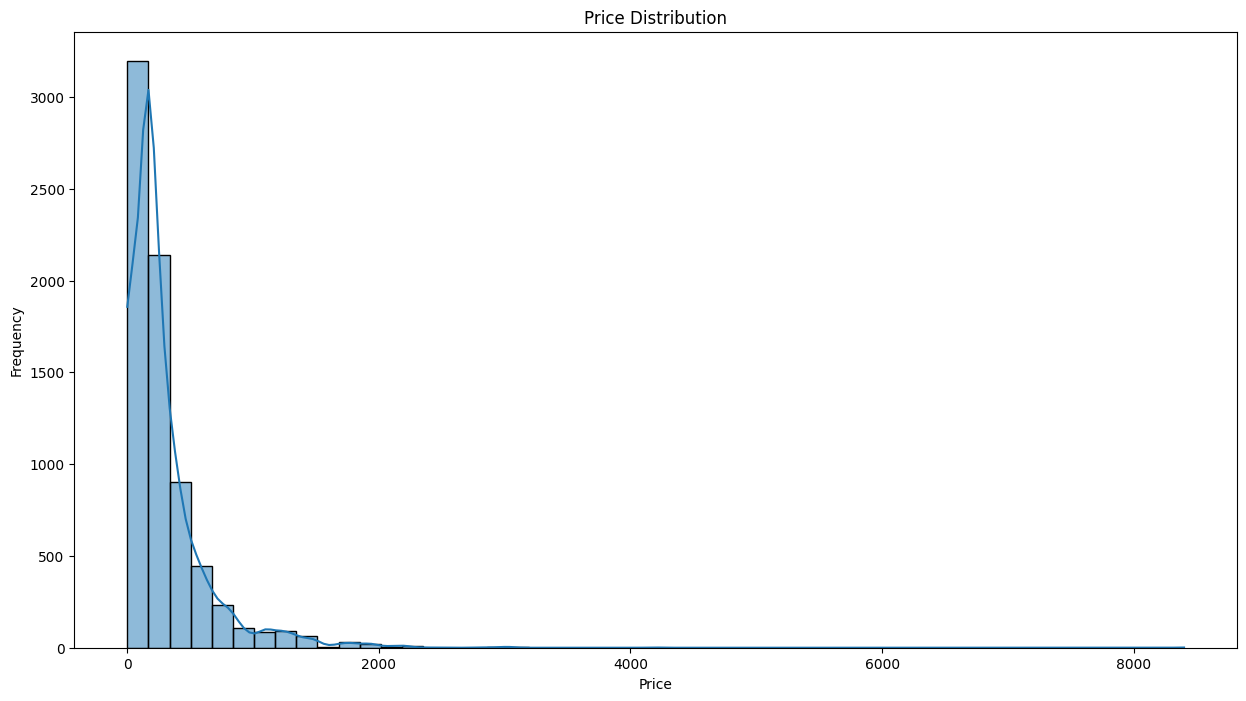

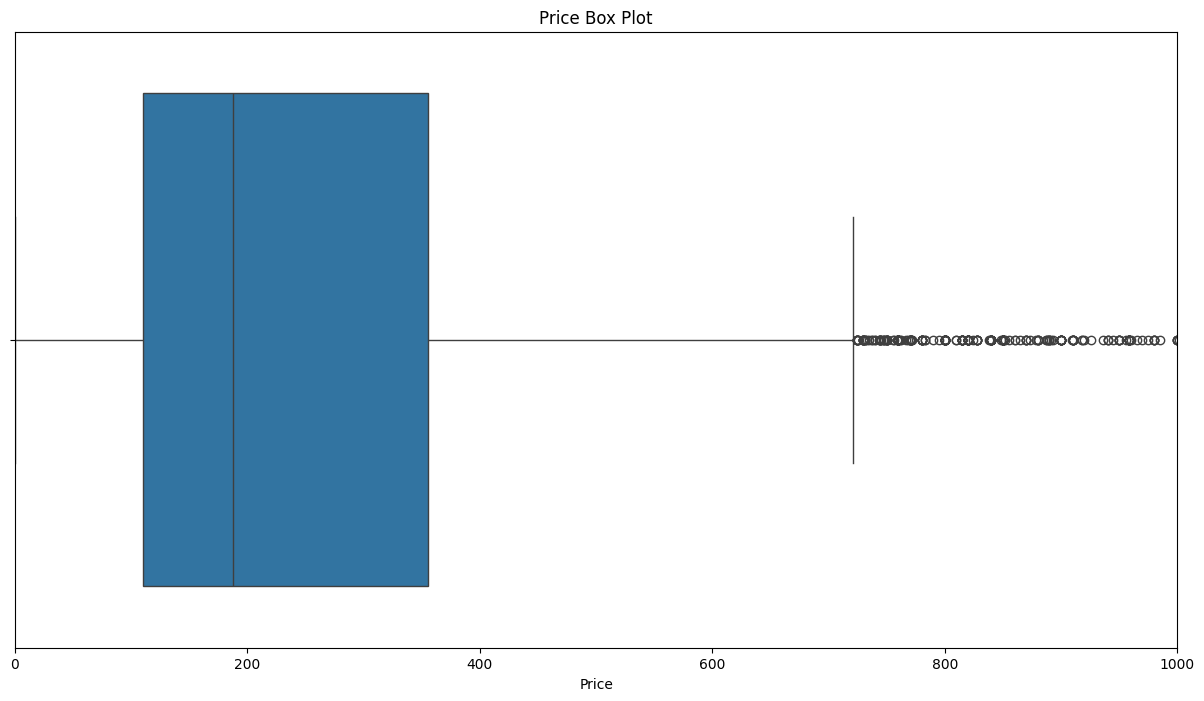

In [11]:

# Histogram for 'price'
plt.figure(figsize=(15, 8))
sns.histplot(df['үнэ'], bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Box plot for 'price'
plt.figure(figsize=(15, 8))
sns.boxplot(x=df['үнэ'])
plt.xlim(0, 1000) 
plt.title('Price Box Plot')
plt.xlabel('Price')
plt.show()


In [12]:
df['үнэ'].describe()

count    7343.000000
mean      286.282657
std       340.850754
min         0.000400
25%       110.000000
50%       188.000000
75%       355.000000
max      8400.000000
Name: үнэ, dtype: float64

In [13]:

df = df[df['үнэ'] > df['үнэ'].min()]
df.shape

(7342, 17)

In [14]:
# inspect datas that have price per square meter less than one.

df[df['үнэ'] / df['Талбай:'] < 1].describe()

,үнэ,Ашиглалтанд орсон он:,Барилгын давхар:,Талбай:,Хэдэн давхарт:,Цонхны тоо:,Код:
count,1379.000000,1379.000000,1379.000000,1.379000e+03,1379.000000,1379.000000,0.0
mean,4.977013,2020.477883,14.116751,3.300579e+05,7.773024,3.696882,NaN
std,17.225799,4.970601,4.571017,1.225263e+07,4.741653,1.519419,NaN
min,1.300000,1982.000000,1.000000,2.950000e+01,1.000000,1.000000,NaN
25%,3.000000,2018.000000,12.000000,5.524500e+01,4.000000,3.000000,NaN
50%,3.500000,2023.000000,16.000000,7.500000e+01,7.000000,3.000000,NaN
75%,4.800000,2024.000000,16.000000,1.095000e+02,11.000000,5.000000,NaN
max,455.000000,2025.000000,25.000000,4.550000e+08,25.000000,8.000000,NaN


In [15]:
# Replace price with price times area if price / area < 1

#this condition checks whether people put their price per square or total price.
condition = df['үнэ'] / df['Талбай:'] < 1
df.loc[condition, 'үнэ'] = df.loc[condition, 'үнэ'] * df.loc[condition, 'Талбай:']
df['үнэ'].describe()


count    7.342000e+03
mean     2.819852e+07
std      2.416104e+09
min      4.500000e+01
25%      1.600000e+02
50%      2.400000e+02
75%      4.270000e+02
max      2.070250e+11
Name: үнэ, dtype: float64

In [16]:
df[(df['үнэ'] > df['үнэ'].min()) & (df['үнэ'] < df['үнэ'].quantile(0.25))]

,үнэ,хаяг,Шал:,Тагт:,Ашиглалтанд орсон он:,Гараж:,Цонх:,Барилгын давхар:,Хаалга:,Талбай:,Хэдэн давхарт:,Лизингээр авах боломж:,Цонхны тоо:,Барилгын явц:,Байршил:,Код:,location:
2,141.4,"УБ — Баянзүрх, Амгалан",Паркет,1 тагттай,2024,Байхгүй,Вакум,16,Бүргэд,50.50,3,Лизинггүй,2,Ашиглалтад ороогүй,NaN,NaN,NaN
5,145.0,"УБ — Баянзүрх, Улаанхуаран",Паркет,1 тагттай,2016,Байхгүй,Вакум,12,Бүргэд,50.32,8,Лизинггүй,3,Ашиглалтад орсон,NaN,NaN,NaN
11,153.0,"УБ — Хан-Уул, Хан-Уул, Хороо 19",Паркет,1 тагттай,2014,Байхгүй,Вакум,12,Бүргэд,48.70,3,Банкны лизингтэй,2,Ашиглалтад орсон,NaN,NaN,NaN
15,110.0,"УБ — Сонгинохайрхан, Москва хороолол",Паркет,1 тагттай,2010,Байхгүй,Вакум,12,Бүргэд,40.00,10,Лизинггүй,4,Ашиглалтад орсон,NaN,NaN,NaN
16,115.0,"УБ — Баянгол, 3, 4 хороолол",Паркет,1 тагттай,2017,Байхгүй,Вакум,8,Төмөр,39.00,2,Лизинггүй,2,Ашиглалтад орсон,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9389,140.0,"УБ — Баянгол, Гэмтэл согог судлалын үндэсний төв",Паркет,1 тагттай,2013,Байгаа,Вакум,12,Бүргэд,43.00,2,Банкны лизингтэй,2,Ашиглалтад орсон,NaN,NaN,NaN
9391,158.0,"УБ — Сонгинохайрхан, 1-р хороолол",Паркет,2 тагттай,1988,Байхгүй,Вакум,9,Бүргэд,40.00,4,Лизинггүй,3,Ашиглалтад орсон,NaN,NaN,NaN
9393,115.0,"УБ — Сонгинохайрхан, 5 шар",Паркет,1 тагттай,1996,Байхгүй,Вакум,5,Бүргэд,52.00,1,Лизинггүй,3,Ашиглалтад орсон,NaN,NaN,NaN
9395,90.0,"УБ — Сонгинохайрхан, Толгойт",Паркет,1 тагттай,2017,Байхгүй,Вакум,9,Бүргэд,38.00,8,Лизинггүй,3,Ашиглалтад орсон,NaN,NaN,NaN


All the values are valid now

In [17]:
#estimating upper bound using inter quartile range method

iqr = df['үнэ'].quantile(0.75) - df['үнэ'].quantile(0.25)

upper_bound = df['үнэ'].quantile(0.75) + 1.5 * iqr

print('upper bound is', upper_bound)

upper bound is 827.5


In [18]:
# count of outliers according to iqr method.

outlier_count = (df['үнэ'] >= upper_bound).sum()
outlier_count

554

In [19]:
# getting rid of outliers 
wo = df[df['үнэ'] <= upper_bound]
wo['үнэ'].describe()

count    6788.000000
mean      282.721093
std       172.071115
min        45.000000
25%       155.000000
50%       224.000000
75%       370.000000
max       825.000000
Name: үнэ, dtype: float64

In [20]:
# just to inspect and make sure it's a valid data
wo[(wo['үнэ'] > 50) & (wo['үнэ'] < 100)].describe()

,үнэ,Ашиглалтанд орсон он:,Барилгын давхар:,Талбай:,Хэдэн давхарт:,Цонхны тоо:,Код:
count,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,0.0
mean,83.771763,2013.833898,9.983051,33.771729,5.776271,1.813559,NaN
std,11.860591,10.152722,4.527661,8.973480,3.858568,0.711293,NaN
min,52.000000,1980.000000,2.000000,12.000000,1.000000,1.000000,NaN
25%,75.000000,2011.500000,5.000000,29.000000,3.000000,1.000000,NaN
50%,86.000000,2015.000000,10.000000,32.400000,5.000000,2.000000,NaN
75%,95.000000,2023.000000,15.000000,38.000000,8.000000,2.000000,NaN
max,99.989100,2025.000000,17.000000,75.000000,16.000000,4.000000,NaN


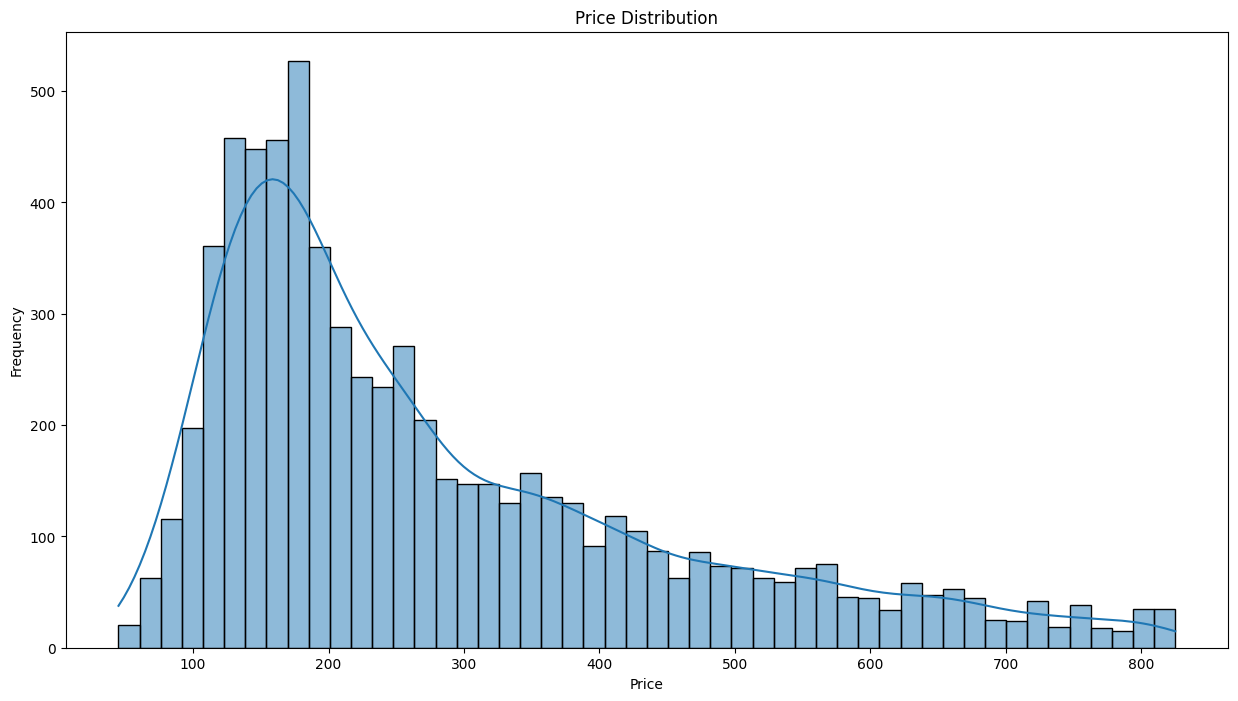

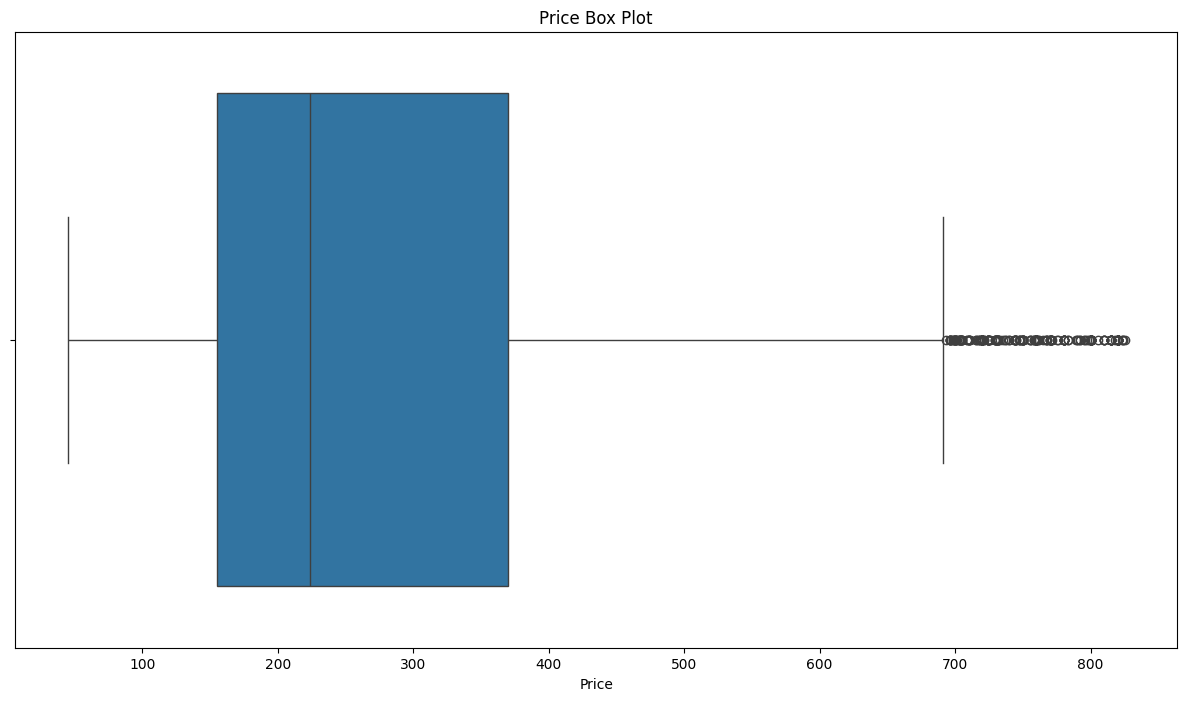

In [21]:

# Histogram for 'price' after outlier removal 
plt.figure(figsize=(15, 8))
sns.histplot(wo['үнэ'], bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Box plot for 'price' after outlier removal

plt.figure(figsize=(15, 8))
sns.boxplot(x=wo['үнэ'])
plt.title('Price Box Plot')
plt.xlabel('Price')
plt.show()


#### Area outlier removal

In [22]:
df['Талбай:'].describe()

count    7.342000e+03
mean     6.205822e+04
std      5.310117e+06
min      1.200000e+01
25%      5.200000e+01
50%      7.000000e+01
75%      1.002300e+02
max      4.550000e+08
Name: Талбай:, dtype: float64

In [23]:
iqr_area = wo['Талбай:'].quantile(0.75) - wo['Талбай:'].quantile(0.25) 
upper_bound_area = wo['Талбай:'].quantile(0.75) + 1.5 * iqr_area

upper_bound_area

152.36124999999998

In [24]:
wo = wo[wo['Талбай:'] < upper_bound_area]
wo.shape

(6610, 17)

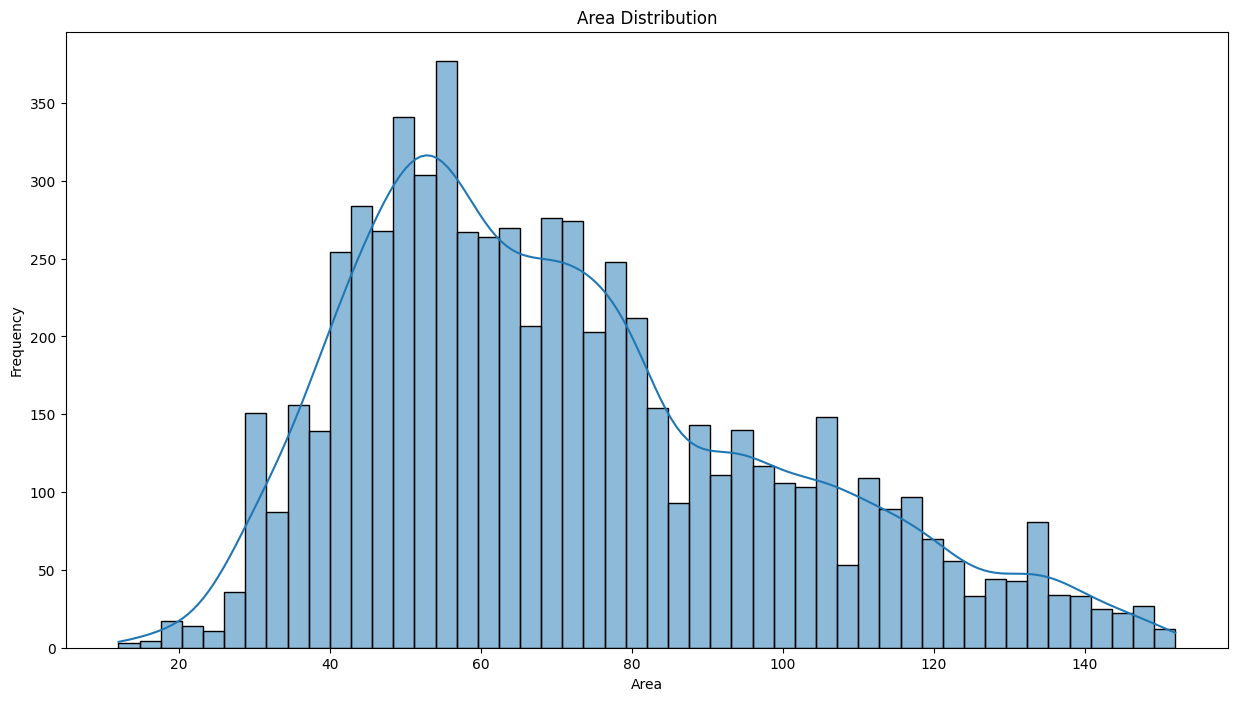

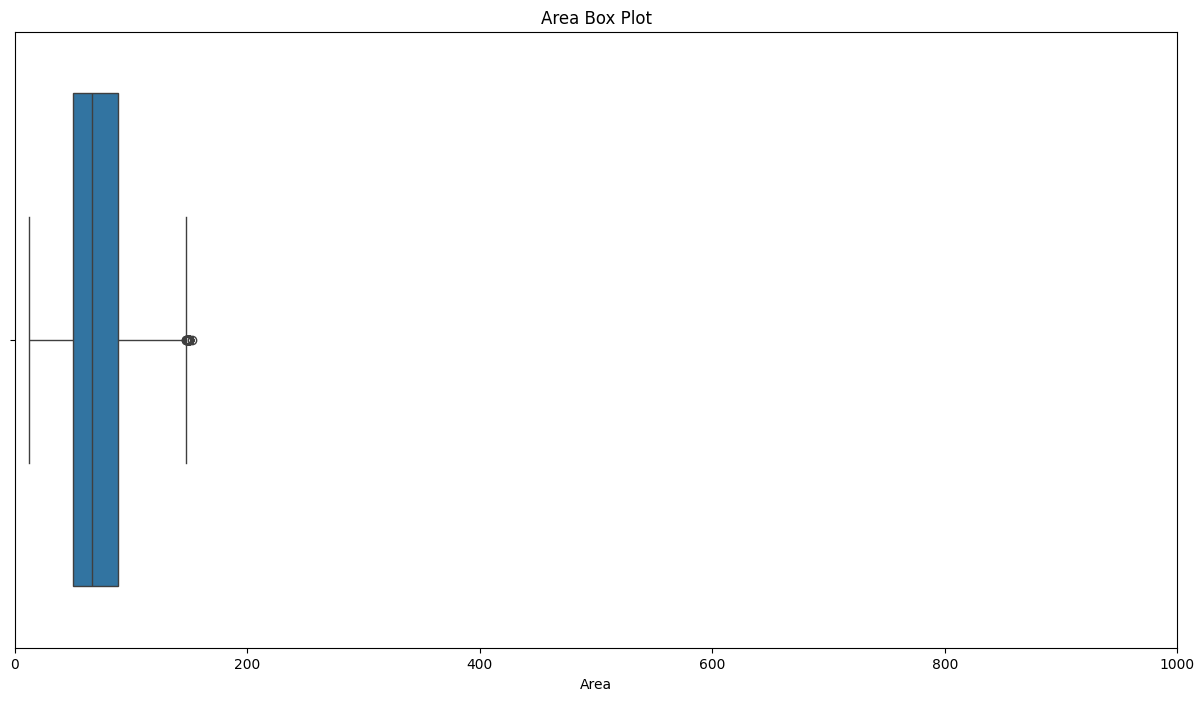

In [25]:

# Histogram for 'area'
plt.figure(figsize=(15, 8))
sns.histplot(wo['Талбай:'], bins=50, kde=True)
plt.title('Area Distribution')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.show()

# Box plot for 'area'  
plt.figure(figsize=(15, 8))
sns.boxplot(x=wo['Талбай:'])
plt.xlim(0, 1000) 
plt.title('Area Box Plot')
plt.xlabel('Area')
plt.show()


In [26]:
wo['Талбай:'].describe()

count    6610.000000
mean       71.176592
std        27.729155
min        12.000000
25%        50.000000
50%        66.000000
75%        88.900000
max       152.000000
Name: Талбай:, dtype: float64

#### Price Per Area Outlier Removal

In [27]:
wo['PricePerArea'] = wo['үнэ'] / wo['Талбай:']

In [28]:
wo['PricePerArea'].describe()

count    6610.000000
mean        3.698668
std         1.220343
min         1.266667
25%         2.900000
50%         3.375300
75%         4.287313
max        19.000000
Name: PricePerArea, dtype: float64

In [928]:
iqr_ppa = wo['PricePerArea'].quantile(0.75) - wo['PricePerArea'].quantile(0.25)
upper_bound_ppa = wo['PricePerArea'].quantile(0.75) + 1.5 * iqr_ppa

upper_bound_ppa

6.368283582089552

In [929]:
wo.shape

(6610, 18)

In [930]:
wo = wo[wo['PricePerArea'] < upper_bound_ppa]
wo.shape

(6377, 18)

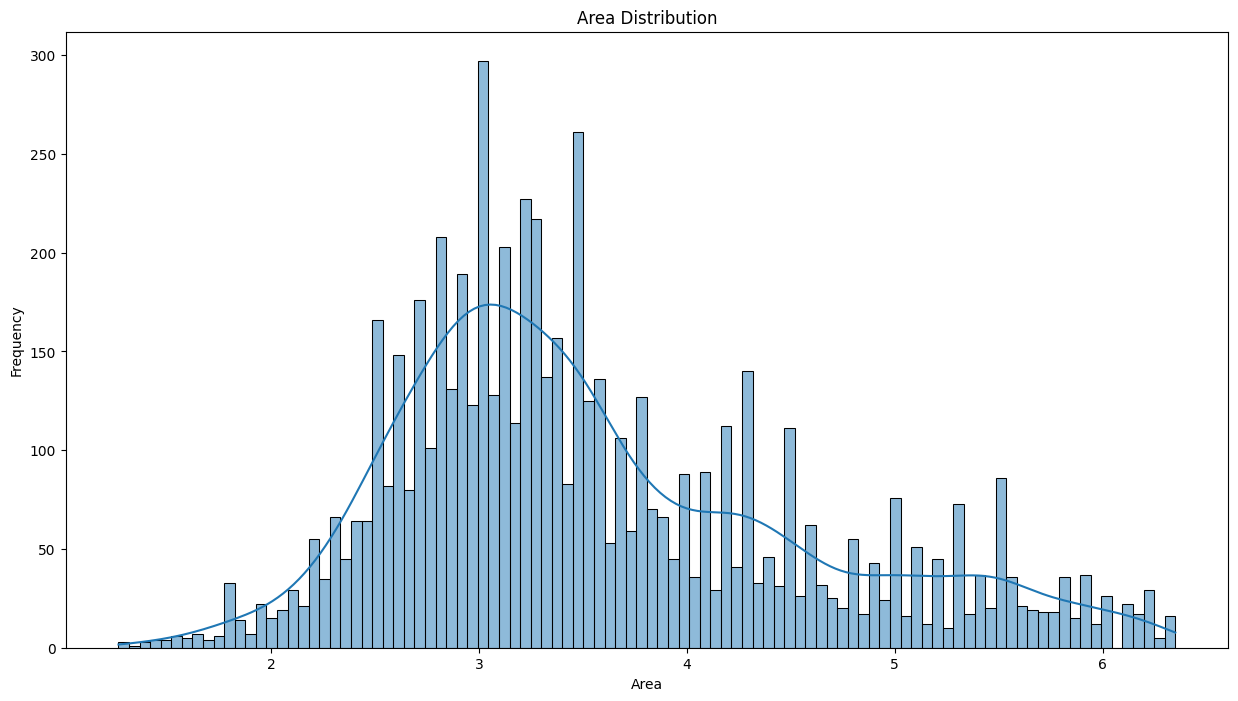

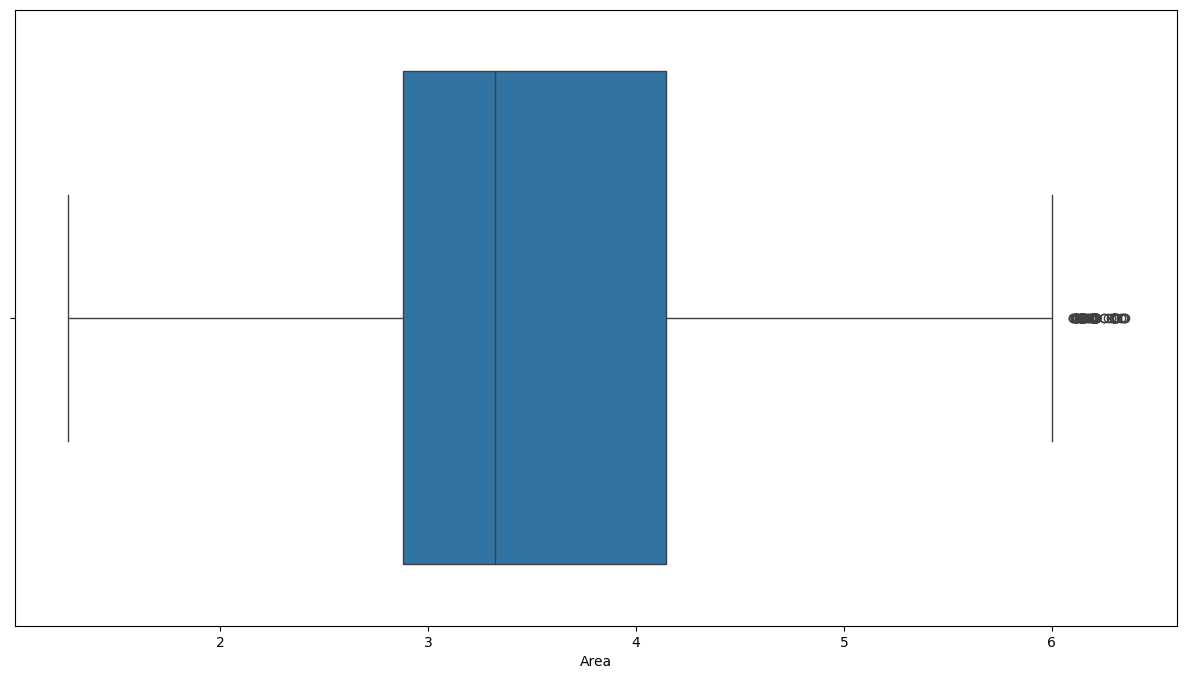

In [931]:
# Histogram for 'Price per Area'

plt.figure(figsize=(15, 8))
sns.histplot(wo['PricePerArea'], bins=100, kde=True)
plt.title('Area Distribution')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.show()

# Box plot for 'Price per area'
plt.figure(figsize=(15, 8))
sns.boxplot(x = wo['PricePerArea'])
plt.title('')
plt.xlabel('Area')
plt.show()


In [932]:
wo['Барилгын давхар:'].describe()

count    6377.000000
mean       12.469500
std         4.491179
min         1.000000
25%         9.000000
50%        12.000000
75%        16.000000
max        25.000000
Name: Барилгын давхар:, dtype: float64

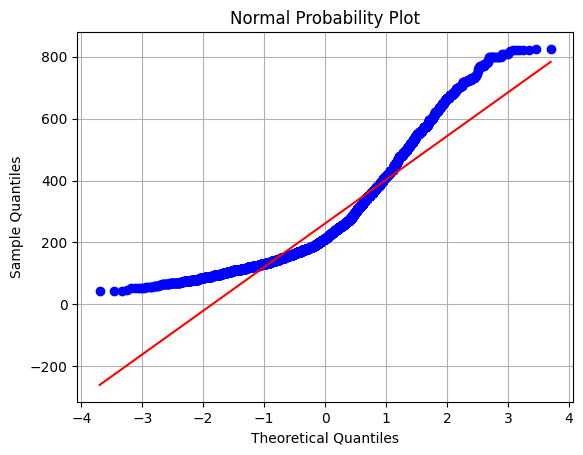

In [933]:
from scipy.stats import probplot

# Create the normal probability plot
target_data = wo['үнэ']
probplot(target_data, plot=plt)

# Show the plot
plt.title("Normal Probability Plot")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.grid(True)
plt.show()

In [934]:
wo.head()

,үнэ,хаяг,Шал:,Тагт:,Ашиглалтанд орсон он:,Гараж:,Цонх:,Барилгын давхар:,Хаалга:,Талбай:,Хэдэн давхарт:,Лизингээр авах боломж:,Цонхны тоо:,Барилгын явц:,Байршил:,Код:,location:,PricePerArea
2,141.4,"УБ — Баянзүрх, Амгалан",Паркет,1 тагттай,2024,Байхгүй,Вакум,16,Бүргэд,50.50,3,Лизинггүй,2,Ашиглалтад ороогүй,NaN,NaN,NaN,2.800000
3,180.0,"УБ — Чингэлтэй, Баянбүрд",Паркет,1 тагттай,2014,Байхгүй,Вакум,12,Бүргэд,50.00,7,Лизинггүй,2,Ашиглалтад орсон,NaN,NaN,NaN,3.600000
4,201.6,"УБ — Хан-Уул, Хан-Уул, Хороо 5",Паркет,1 тагттай,2025,Байхгүй,Вакум,16,Бүргэд,72.00,7,Хувь лизингтэй,5,Ашиглалтад ороогүй,NaN,NaN,NaN,2.800000
5,145.0,"УБ — Баянзүрх, Улаанхуаран",Паркет,1 тагттай,2016,Байхгүй,Вакум,12,Бүргэд,50.32,8,Лизинггүй,3,Ашиглалтад орсон,NaN,NaN,NaN,2.881558
6,160.0,"УБ — Баянгол, 25-р эмийн сан",Паркет,Тагтгүй,2008,Байхгүй,Вакум,6,Бүргэд,60.00,6,Банкны лизингтэй,4,Ашиглалтад орсон,NaN,NaN,NaN,2.666667


In [935]:
# To count different values of floor
df['Шал:'].value_counts()


Шал:
Паркет     7072
Ламинат     110
Мод          98
Цемент       37
Плита        19
Чулуу         6
Name: count, dtype: int64

In [936]:
# To count different values of address
wo['хаяг'].value_counts()


хаяг
УБ — Хан-Уул, Яармаг                             605
УБ — Хан-Уул, Зайсан                             397
УБ — Баянзүрх, Баянзүрх, Хороо 26                309
УБ — Хан-Уул, Нисэх                              244
УБ — Хан-Уул, Хан-Уул, Хороо 15                  168
                                                ... 
УБ — Баянзүрх, Баянзүрх, Хороо 7                   1
УБ — Баянзүрх, Гачуурт                             1
УБ — Баянзүрх, Сандэй плаза                        1
УБ — Сонгинохайрхан, Сонгинохайрхан, Хороо 1       1
УБ — Сонгинохайрхан, Сонгинохайрхан, Хороо 38      1
Name: count, Length: 270, dtype: int64

In [937]:
# To count different values of windows
wo['Цонх:'].value_counts()

Цонх:
Вакум          6172
Төмөр вакум     128
Модон вакум      43
Мод              34
Name: count, dtype: int64

### Structural Errors

* Replace any null variables to zero if applicable
* Fix any typos and capitalization errors 

In [938]:
#replace NaN values with 0 for garage
wo['Гараж:'] = wo['Гараж:'].fillna(0)
wo.head()

,үнэ,хаяг,Шал:,Тагт:,Ашиглалтанд орсон он:,Гараж:,Цонх:,Барилгын давхар:,Хаалга:,Талбай:,Хэдэн давхарт:,Лизингээр авах боломж:,Цонхны тоо:,Барилгын явц:,Байршил:,Код:,location:,PricePerArea
2,141.4,"УБ — Баянзүрх, Амгалан",Паркет,1 тагттай,2024,Байхгүй,Вакум,16,Бүргэд,50.50,3,Лизинггүй,2,Ашиглалтад ороогүй,NaN,NaN,NaN,2.800000
3,180.0,"УБ — Чингэлтэй, Баянбүрд",Паркет,1 тагттай,2014,Байхгүй,Вакум,12,Бүргэд,50.00,7,Лизинггүй,2,Ашиглалтад орсон,NaN,NaN,NaN,3.600000
4,201.6,"УБ — Хан-Уул, Хан-Уул, Хороо 5",Паркет,1 тагттай,2025,Байхгүй,Вакум,16,Бүргэд,72.00,7,Хувь лизингтэй,5,Ашиглалтад ороогүй,NaN,NaN,NaN,2.800000
5,145.0,"УБ — Баянзүрх, Улаанхуаран",Паркет,1 тагттай,2016,Байхгүй,Вакум,12,Бүргэд,50.32,8,Лизинггүй,3,Ашиглалтад орсон,NaN,NaN,NaN,2.881558
6,160.0,"УБ — Баянгол, 25-р эмийн сан",Паркет,Тагтгүй,2008,Байхгүй,Вакум,6,Бүргэд,60.00,6,Банкны лизингтэй,4,Ашиглалтад орсон,NaN,NaN,NaN,2.666667


In [939]:
wo.shape

(6377, 18)

In [940]:
#getting rid of unnecessary words
wo['Тагт:'] = wo['Тагт:'].fillna('0')
wo['Тагт:'] = wo['Тагт:'].str.replace('тагттай', '').str.strip()
wo['Тагт:'] = wo['Тагт:'].str.replace('Тагтгүй', '0').str.strip()
wo['Тагт:'] = wo['Тагт:'].str.replace('3+', '3').str.strip()
wo['Талбай:'] = pd.to_numeric(wo['Талбай:'], errors='coerce')

wo.head()

,үнэ,хаяг,Шал:,Тагт:,Ашиглалтанд орсон он:,Гараж:,Цонх:,Барилгын давхар:,Хаалга:,Талбай:,Хэдэн давхарт:,Лизингээр авах боломж:,Цонхны тоо:,Барилгын явц:,Байршил:,Код:,location:,PricePerArea
2,141.4,"УБ — Баянзүрх, Амгалан",Паркет,1,2024,Байхгүй,Вакум,16,Бүргэд,50.50,3,Лизинггүй,2,Ашиглалтад ороогүй,NaN,NaN,NaN,2.800000
3,180.0,"УБ — Чингэлтэй, Баянбүрд",Паркет,1,2014,Байхгүй,Вакум,12,Бүргэд,50.00,7,Лизинггүй,2,Ашиглалтад орсон,NaN,NaN,NaN,3.600000
4,201.6,"УБ — Хан-Уул, Хан-Уул, Хороо 5",Паркет,1,2025,Байхгүй,Вакум,16,Бүргэд,72.00,7,Хувь лизингтэй,5,Ашиглалтад ороогүй,NaN,NaN,NaN,2.800000
5,145.0,"УБ — Баянзүрх, Улаанхуаран",Паркет,1,2016,Байхгүй,Вакум,12,Бүргэд,50.32,8,Лизинггүй,3,Ашиглалтад орсон,NaN,NaN,NaN,2.881558
6,160.0,"УБ — Баянгол, 25-р эмийн сан",Паркет,0,2008,Байхгүй,Вакум,6,Бүргэд,60.00,6,Банкны лизингтэй,4,Ашиглалтад орсон,NaN,NaN,NaN,2.666667


In [941]:
#checking if they have been removed correctly 
count = wo['Тагт:'].value_counts()
count

Тагт:
1    5089
2     727
0     506
3      55
Name: count, dtype: int64

In [942]:
wo.head()

,үнэ,хаяг,Шал:,Тагт:,Ашиглалтанд орсон он:,Гараж:,Цонх:,Барилгын давхар:,Хаалга:,Талбай:,Хэдэн давхарт:,Лизингээр авах боломж:,Цонхны тоо:,Барилгын явц:,Байршил:,Код:,location:,PricePerArea
2,141.4,"УБ — Баянзүрх, Амгалан",Паркет,1,2024,Байхгүй,Вакум,16,Бүргэд,50.50,3,Лизинггүй,2,Ашиглалтад ороогүй,NaN,NaN,NaN,2.800000
3,180.0,"УБ — Чингэлтэй, Баянбүрд",Паркет,1,2014,Байхгүй,Вакум,12,Бүргэд,50.00,7,Лизинггүй,2,Ашиглалтад орсон,NaN,NaN,NaN,3.600000
4,201.6,"УБ — Хан-Уул, Хан-Уул, Хороо 5",Паркет,1,2025,Байхгүй,Вакум,16,Бүргэд,72.00,7,Хувь лизингтэй,5,Ашиглалтад ороогүй,NaN,NaN,NaN,2.800000
5,145.0,"УБ — Баянзүрх, Улаанхуаран",Паркет,1,2016,Байхгүй,Вакум,12,Бүргэд,50.32,8,Лизинггүй,3,Ашиглалтад орсон,NaN,NaN,NaN,2.881558
6,160.0,"УБ — Баянгол, 25-р эмийн сан",Паркет,0,2008,Байхгүй,Вакум,6,Бүргэд,60.00,6,Банкны лизингтэй,4,Ашиглалтад орсон,NaN,NaN,NaN,2.666667


# Label Encoding

* Binary classifying for features that have either true or false value.

In [943]:
#mapping values 

mapping = {
    'Банкны лизингтэй': '1',
    'Лизинггүй' : '0',
    'Хувь лизингтэй' : '1'
}
garagemap = {
    'Байхгүй' : '0',
    'Байгаа' : '1',
}
usagemap = {
    'Ашиглалтад орсон' : '1',
    'Ашиглалтад ороогүй': '0',
}
wo['Гараж:'] = wo['Гараж:'].str.strip()
wo['Гараж:'] = wo['Гараж:'].map(garagemap)

wo['Лизингээр авах боломж:'] = wo['Лизингээр авах боломж:'].str.strip()
wo['Лизингээр авах боломж:'] = wo['Лизингээр авах боломж:'].map(mapping)

wo['Барилгын явц:'] = wo['Барилгын явц:'].str.strip()
wo['Барилгын явц:'] = wo['Барилгын явц:'].map(usagemap)


wo.head()

,үнэ,хаяг,Шал:,Тагт:,Ашиглалтанд орсон он:,Гараж:,Цонх:,Барилгын давхар:,Хаалга:,Талбай:,Хэдэн давхарт:,Лизингээр авах боломж:,Цонхны тоо:,Барилгын явц:,Байршил:,Код:,location:,PricePerArea
2,141.4,"УБ — Баянзүрх, Амгалан",Паркет,1,2024,0,Вакум,16,Бүргэд,50.50,3,0,2,0,NaN,NaN,NaN,2.800000
3,180.0,"УБ — Чингэлтэй, Баянбүрд",Паркет,1,2014,0,Вакум,12,Бүргэд,50.00,7,0,2,1,NaN,NaN,NaN,3.600000
4,201.6,"УБ — Хан-Уул, Хан-Уул, Хороо 5",Паркет,1,2025,0,Вакум,16,Бүргэд,72.00,7,1,5,0,NaN,NaN,NaN,2.800000
5,145.0,"УБ — Баянзүрх, Улаанхуаран",Паркет,1,2016,0,Вакум,12,Бүргэд,50.32,8,0,3,1,NaN,NaN,NaN,2.881558
6,160.0,"УБ — Баянгол, 25-р эмийн сан",Паркет,0,2008,0,Вакум,6,Бүргэд,60.00,6,1,4,1,NaN,NaN,NaN,2.666667


In [944]:
wo.shape

(6377, 18)

In [945]:
wo.isnull().sum()

үнэ                          0
хаяг                         0
Шал:                         0
Тагт:                        0
Ашиглалтанд орсон он:        0
Гараж:                       0
Цонх:                        0
Барилгын давхар:             0
Хаалга:                      0
Талбай:                      0
Хэдэн давхарт:               0
Лизингээр авах боломж:       0
Цонхны тоо:                  0
Барилгын явц:                1
Байршил:                  6373
Код:                      6377
location:                 6376
PricePerArea                 0
dtype: int64

In [946]:
wo = wo.drop(columns= ['Байршил:', 'Код:', 'location:'])
wo.head()

,үнэ,хаяг,Шал:,Тагт:,Ашиглалтанд орсон он:,Гараж:,Цонх:,Барилгын давхар:,Хаалга:,Талбай:,Хэдэн давхарт:,Лизингээр авах боломж:,Цонхны тоо:,Барилгын явц:,PricePerArea
2,141.4,"УБ — Баянзүрх, Амгалан",Паркет,1,2024,0,Вакум,16,Бүргэд,50.50,3,0,2,0,2.800000
3,180.0,"УБ — Чингэлтэй, Баянбүрд",Паркет,1,2014,0,Вакум,12,Бүргэд,50.00,7,0,2,1,3.600000
4,201.6,"УБ — Хан-Уул, Хан-Уул, Хороо 5",Паркет,1,2025,0,Вакум,16,Бүргэд,72.00,7,1,5,0,2.800000
5,145.0,"УБ — Баянзүрх, Улаанхуаран",Паркет,1,2016,0,Вакум,12,Бүргэд,50.32,8,0,3,1,2.881558
6,160.0,"УБ — Баянгол, 25-р эмийн сан",Паркет,0,2008,0,Вакум,6,Бүргэд,60.00,6,1,4,1,2.666667


In [947]:
wo.shape

(6377, 15)

In [948]:
wo.head()

,үнэ,хаяг,Шал:,Тагт:,Ашиглалтанд орсон он:,Гараж:,Цонх:,Барилгын давхар:,Хаалга:,Талбай:,Хэдэн давхарт:,Лизингээр авах боломж:,Цонхны тоо:,Барилгын явц:,PricePerArea
2,141.4,"УБ — Баянзүрх, Амгалан",Паркет,1,2024,0,Вакум,16,Бүргэд,50.50,3,0,2,0,2.800000
3,180.0,"УБ — Чингэлтэй, Баянбүрд",Паркет,1,2014,0,Вакум,12,Бүргэд,50.00,7,0,2,1,3.600000
4,201.6,"УБ — Хан-Уул, Хан-Уул, Хороо 5",Паркет,1,2025,0,Вакум,16,Бүргэд,72.00,7,1,5,0,2.800000
5,145.0,"УБ — Баянзүрх, Улаанхуаран",Паркет,1,2016,0,Вакум,12,Бүргэд,50.32,8,0,3,1,2.881558
6,160.0,"УБ — Баянгол, 25-р эмийн сан",Паркет,0,2008,0,Вакум,6,Бүргэд,60.00,6,1,4,1,2.666667


# Import the cleaned data to a new csv.

In [949]:
wo.to_csv('datas/cleaned_data.csv', index=False)